<a href="https://colab.research.google.com/github/Naren8520/Python/blob/main/grafico_de_pareto_Aseguradora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

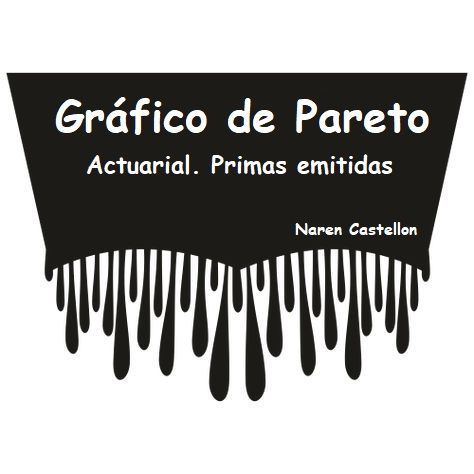

In [1]:
#@title
from IPython.display import Image
Image("/content/grafico_pareto.jpg")

# **Gráfico de Pareto** 

El diagrama de Pareto, también llamado **Curva Cerrada** o **Distribución A-B-C**

Es una gráica para organizar datos de forma que estos queden en orden descendente, de izquierda a derecha y separados por barras. Permite asignar un orden prioridades. El diagrama permite mostrar gráficamente el **Principio de Pareto** (pocos vitales, muchos triviales), es decir, que hay muchos problemas sin importancia frente a unos pocos muy importantes.

Hay que tener en cuenta que tanto la distribución de los efectos como sus posibles causas no es un proceso lineal sino que el 20% de las causas totales hace que sean originados por el 80% de los efectos y rebotes internos del pronosticado.

Su principal  uso que tiene el elaborar este tipo de gráfico es para poder establecer un orden de prioridades en la toma de decisiones dentro de una organización. Evaluar todas las fallas, saber si se pueden resolver o mejor evitarlas.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams.update({'font.size':14})

## **Primas de Seguro de Vidas para Abril del 2020**

In [ ]:
df = pd.DataFrame({'Aseguradoras':['Sura','Seguro alfa',
                                  'Seguros Bolivar', 'Seguros Positiva',
                                  'Axa Colpatria'],
                  'Primas Emitidas($)':[1570749,1095112,644777,390671,296677]})# Millones de dólares

df

,Aseguradoras,Primas Emitidas($)
0,Sura,1570749
1,Seguro alfa,1095112
2,Seguros Bolivar,644777
3,Seguros Positiva,390671
4,Axa Colpatria,296677


In [ ]:
#Suma acumulada 
df['Primas Emitidas($)'].cumsum()

0    1570749
1    2665861
2    3310638
3    3701309
4    3997986
Name: Primas Emitidas($), dtype: int64

In [ ]:
df['Primas Emitidas($)'].sum()

3997986

In [ ]:
df['Freq(%)'] = df['Primas Emitidas($)']/df['Primas Emitidas($)'].sum()*100

In [ ]:
df

,Aseguradoras,Primas Emitidas($),Freq(%)
0,Sura,1570749,39.288507
1,Seguro alfa,1095112,27.391592
2,Seguros Bolivar,644777,16.127545
3,Seguros Positiva,390671,9.771695
4,Axa Colpatria,296677,7.420661


In [ ]:
df['cum (%)'] = df['Primas Emitidas($)'].cumsum()/df['Primas Emitidas($)'].sum()*100

In [ ]:
df

,Aseguradoras,Primas Emitidas($),Freq(%),cum (%)
0,Sura,1570749,39.288507,39.288507
1,Seguro alfa,1095112,27.391592,66.680098
2,Seguros Bolivar,644777,16.127545,82.807644
3,Seguros Positiva,390671,9.771695,92.579339
4,Axa Colpatria,296677,7.420661,100.000000


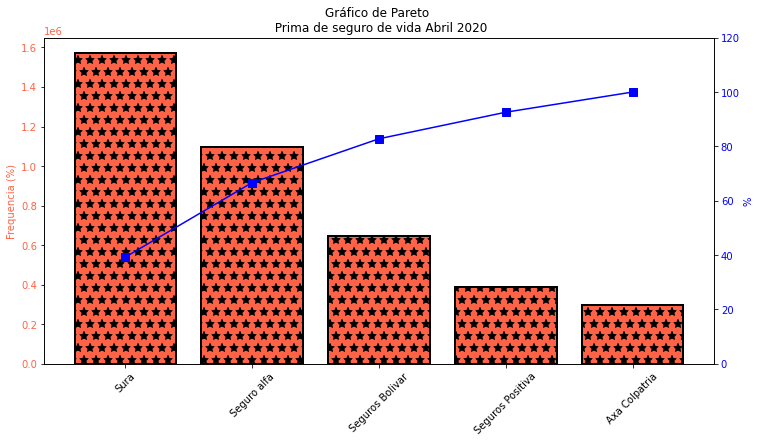

In [ ]:
fig,ax1 = plt.subplots(figsize = (12,6))

ax1.set_title('Gráfico de Pareto \n Prima de seguro de vida Abril 2020')

color1 = 'tomato'
#ax1.set_xlabel('X')
ax1.set_ylabel('Frequencia (%)',color = color1)

ax1.bar(df['Aseguradoras'], df['Primas Emitidas($)'],color = color1,edgecolor = 'black',linewidth = 2,\
       hatch = '*')
#ax1.set_ylim([-10,10])
ax1.tick_params(axis = 'y',labelcolor = color1)

color2 = 'Blue'
ax2 = ax1.twinx() # compartilhar o mesmo eixo x
ax2.set_ylabel('%',color = color2) 

ax2.plot(df['Aseguradoras'], df['cum (%)'],color = color2,marker = 's',markersize = 8, linestyle = '-')

ax2.tick_params(axis = 'y',labelcolor = color2)
ax2.set_ylim([0,120])

for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
    
plt.savefig('GraficoPareto.png',format='png',dpi = 100, bbox_inches = 'tight')
plt.show()